### Download data from Morse et al

https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE128033

There's a single ~500MB file with all counts and barcodes for analyzed samples. This should be.

In [1]:
import scanpy as sc
from os.path import join, exists
from os import listdir
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore')
d = '../data/morse'

ImportError: /home/icb/ignacio.ibarra/miniconda3/envs/covid_macrophages_integration/lib/python3.8/site-packages/tables/hdf5extension.cpython-38-x86_64-linux-gnu.so: undefined symbol: H5Pset_fapl_direct

In [2]:
print('data loaded successfully')

data loaded successfully


In [3]:
print('done...')

done...


In [4]:
!ls -ltrh data/morse | grep genes

-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 259K Mar  8  2019 GSM3660641_SC14NOR_genes.tsv.gz
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 259K Mar  8  2019 GSM3660642_SC31NOR_genes.tsv.gz
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 259K Mar  8  2019 GSM3660643_SC31DNOR_genes.tsv.gz
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 259K Mar  8  2019 GSM3660644_SC45NOR_genes.tsv.gz
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 259K Mar  8  2019 GSM3660645_SC56NOR_genes.tsv.gz
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 259K Mar  8  2019 GSM3660646_SC59NOR_genes.tsv.gz
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 259K Mar  8  2019 GSM3660647_SC155NORLOW_genes.tsv.gz
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 259K Mar  8  2019 GSM3660648_SC156NORUP_genes.tsv.gz
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 259K Mar  8  2019 GSM3660649_SC228NORbal_frozen_genes.tsv.gz
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 265K Mar  8  2019 GSM3660650_SC249NORbal_fresh_genes.tsv.gz
-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 259K Mar  8  2019 GS

In [5]:
import pandas as pd
from os.path import join

In [6]:
df = []
for f in ['CCA_3nor3ipf_WorkspaceV4_newipfupdated_ClusterIdent.csv',
          'CCA_NorControls_WorkspaceV2_activeIdent.csv']:
    df2 = pd.read_csv(join('data', f), sep=',', index_col=0)
    df2.columns = ['annotation']
    df2['patient'] = df2.index.str.split('_').str[0]
    df.append(df2)
df = pd.concat(df)

In [13]:
import seaborn as sns

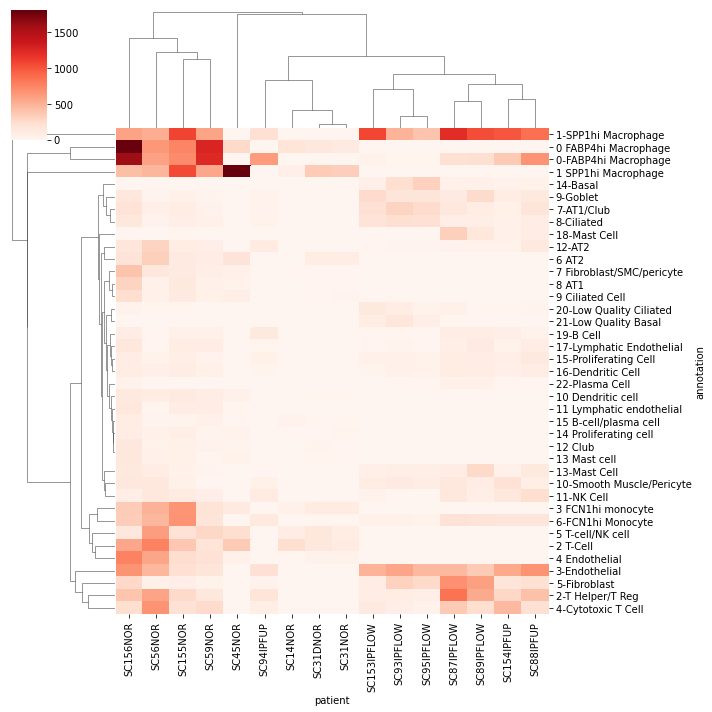

In [18]:
sns.clustermap(df.groupby(['patient', 'annotation']).size().reset_index().pivot('patient', 'annotation', 0).fillna(0).transpose(), cmap='Reds',
              yticklabels=True)

In [7]:
for f in set(df['patient']):
    print(df[df['patient'] == f]['annotation'].value_counts().to_dict())

{'0 FABP4hi Macrophage': 1801, '0-FABP4hi Macrophage': 1599, '4 Endothelial': 765, '3-Endothelial': 669, '1-SPP1hi Macrophage': 590, '2 T-Cell': 560, '1 SPP1hi Macrophage': 434, '7 Fibroblast/SMC/pericyte': 397, '2-T Helper/T Reg': 394, '3 FCN1hi monocyte': 351, '6-FCN1hi Monocyte': 340, '8 AT1': 310, '5-Fibroblast': 273, '4-Cytotoxic T Cell': 235, '9 Ciliated Cell': 234, '7-AT1/Club': 201, '6 AT2': 187, '12-AT2': 164, '8-Ciliated': 156, '5 T-cell/NK cell': 151, '17-Lymphatic Endothelial': 147, '11 Lymphatic endothelial': 147, '12 Club': 141, '10-Smooth Muscle/Pericyte': 140, '9-Goblet': 137, '13 Mast cell': 135, '13-Mast Cell': 134, '10 Dendritic cell': 132, '16-Dendritic Cell': 103, '15 B-cell/plasma cell': 99, '19-B Cell': 89, '14 Proliferating cell': 88, '15-Proliferating Cell': 88, '11-NK Cell': 80, '20-Low Quality Ciliated': 33, '22-Plasma Cell': 30, '18-Mast Cell': 13, '14-Basal': 5}
{'1-SPP1hi Macrophage': 1091, '1 SPP1hi Macrophage': 1057, '0 FABP4hi Macrophage': 751, '0-FABP4

### Metadata
- Currently metadata is nowwhere to be found.
- We use the LCA annotation metadata (atm, confirm labels).
- Replace h5ad path with the latest LCA h5ad generated

In [69]:
raw_annotated_lca_h5ad_path = ''
if exists(raw_annotated_lca_h5ad_path):
    lca = sc.read_h5ad(raw_annotated_lca_h5ad_path)
    laf = lca[lca.obs['dataset'].isin({'Pittsburgh_Lafyatis_2019Morse_10Xv1',
                                       'Pittsburgh_Lafyatis_2019Morse_10Xv2'}),:]
    laf.write('../data/morse/morse_lca_with_metadata.h5ad', compression='lzf')
    
    laf_mac = laf[laf.obs['original_celltype_ann'].str.contains('Macrophage'),:]
    laf_mac.write('../data/morse/morse_lca_with_metadata_macrophages.h5ad', compression='lzf')
laf_mac = sc.read_h5ad('../data/morse/morse_lca_with_metadata_macrophages.h5ad')

In [ ]:
laf_mac_ad_by_sample = {sample: laf_mac[laf_mac.obs['sample'] == sample,:] for sample in set(laf_mac.obs['sample'])}

### Read raw counts

In [37]:
uniq_k = {"_".join(k.split("_")[:2]) for k in listdir(d) if k.endswith(".mtx.gz")}

{'GSM3660641_SC14NOR',
 'GSM3660642_SC31NOR',
 'GSM3660643_SC31DNOR',
 'GSM3660644_SC45NOR',
 'GSM3660645_SC56NOR',
 'GSM3660646_SC59NOR',
 'GSM3660647_SC155NORLOW',
 'GSM3660648_SC156NORUP',
 'GSM3660649_SC228NORbal',
 'GSM3660650_SC249NORbal',
 'GSM3660651_SC87IPFLOW',
 'GSM3660652_SC88IPFUP',
 'GSM3660653_SC89IPFLOW',
 'GSM3660654_SC93IPFLOW',
 'GSM3660655_SC94IPFUP',
 'GSM3660656_SC95IPFLOW',
 'GSM3660657_SC153IPFLOW',
 'GSM3660658_SC154IPFUP'}

In [66]:
for code in uniq_k:
    output_path = 'data/morse/by_patient/%s.h5ad' % code
    print(exists(output_path), output_path)
    if exists(output_path):
        continue
    # print('reading', code)
    
    print(code,
          code.split('_')[1][:4] in set(df['patient']),
          code.split('_')[1][:5] in set(df['patient']))
    
    # if code in ad_by_k:
    #     continue
    mtx_path = join(d, '%s_matrix.mtx.gz' % code)
    var_path = join(d, '%s_genes.tsv.gz' % code)
    obs_path = join(d, '%s_barcodes.tsv.gz' % code)

    # print(exists(mtx_path), mtx_path)
    # print(exists(var_path), var_path)
    # print(exists(obs_path), obs_path)

    if not exists(mtx_path):
        mtx_path = join(d, '%s_frozen_matrix.mtx.gz' % code)
        var_path = join(d, '%s_frozen_genes.tsv.gz' % code)
        obs_path = join(d, '%s_frozen_barcodes.tsv.gz' % code)
    if not exists(mtx_path):
        mtx_path = join(d, '%s_fresh_matrix.mtx.gz' % code)
        var_path = join(d, '%s_fresh_genes.tsv.gz' % code)
        obs_path = join(d, '%s_fresh_barcodes.tsv.gz' % code)
        
    ad = sc.read_mtx(mtx_path, dtype='float32').transpose()
    obs = pd.read_csv(obs_path, header=None, sep='\t')
    var = pd.read_csv(var_path, header=None, sep='\t')
    
    var.columns = ['ensembl', 'symbol'] if len(var.columns) == 2 else ['ensembl', 'symbol', 'readout']
    var.index = np.array(var.ensembl)
    ad.var = var
    obs.columns = ['barcode']
    ad.obs.index = obs['barcode']
    
    ad.obs['GSM'] = code.split('_')[0]
    ad.obs['sample.id'] = code.split('_')[1]
    # ad_by_k[code] = ad
    
    ad.write(output_path, compression='lzf')

True data/morse/by_patient/GSM3660648_SC156NORUP.h5ad
False data/morse/by_patient/GSM3660644_SC45NOR.h5ad
GSM3660644_SC45NOR False False
True ../data/morse/GSM3660644_SC45NOR_matrix.mtx.gz
True ../data/morse/GSM3660644_SC45NOR_genes.tsv.gz
True ../data/morse/GSM3660644_SC45NOR_barcodes.tsv.gz


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660657_SC153IPFLOW.h5ad
GSM3660657_SC153IPFLOW False False
True ../data/morse/GSM3660657_SC153IPFLOW_matrix.mtx.gz
True ../data/morse/GSM3660657_SC153IPFLOW_genes.tsv.gz
True ../data/morse/GSM3660657_SC153IPFLOW_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660645_SC56NOR.h5ad
GSM3660645_SC56NOR False False
True ../data/morse/GSM3660645_SC56NOR_matrix.mtx.gz
True ../data/morse/GSM3660645_SC56NOR_genes.tsv.gz
True ../data/morse/GSM3660645_SC56NOR_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660646_SC59NOR.h5ad
GSM3660646_SC59NOR False False
True ../data/morse/GSM3660646_SC59NOR_matrix.mtx.gz
True ../data/morse/GSM3660646_SC59NOR_genes.tsv.gz
True ../data/morse/GSM3660646_SC59NOR_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660641_SC14NOR.h5ad
GSM3660641_SC14NOR False False
True ../data/morse/GSM3660641_SC14NOR_matrix.mtx.gz
True ../data/morse/GSM3660641_SC14NOR_genes.tsv.gz
True ../data/morse/GSM3660641_SC14NOR_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660656_SC95IPFLOW.h5ad
GSM3660656_SC95IPFLOW False False
True ../data/morse/GSM3660656_SC95IPFLOW_matrix.mtx.gz
True ../data/morse/GSM3660656_SC95IPFLOW_genes.tsv.gz
True ../data/morse/GSM3660656_SC95IPFLOW_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660643_SC31DNOR.h5ad
GSM3660643_SC31DNOR False False
True ../data/morse/GSM3660643_SC31DNOR_matrix.mtx.gz
True ../data/morse/GSM3660643_SC31DNOR_genes.tsv.gz
True ../data/morse/GSM3660643_SC31DNOR_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660652_SC88IPFUP.h5ad
GSM3660652_SC88IPFUP False False
True ../data/morse/GSM3660652_SC88IPFUP_matrix.mtx.gz
True ../data/morse/GSM3660652_SC88IPFUP_genes.tsv.gz
True ../data/morse/GSM3660652_SC88IPFUP_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660649_SC228NORbal.h5ad
GSM3660649_SC228NORbal False False
False ../data/morse/GSM3660649_SC228NORbal_matrix.mtx.gz
False ../data/morse/GSM3660649_SC228NORbal_genes.tsv.gz
False ../data/morse/GSM3660649_SC228NORbal_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660651_SC87IPFLOW.h5ad
GSM3660651_SC87IPFLOW False False
True ../data/morse/GSM3660651_SC87IPFLOW_matrix.mtx.gz
True ../data/morse/GSM3660651_SC87IPFLOW_genes.tsv.gz
True ../data/morse/GSM3660651_SC87IPFLOW_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660653_SC89IPFLOW.h5ad
GSM3660653_SC89IPFLOW False False
True ../data/morse/GSM3660653_SC89IPFLOW_matrix.mtx.gz
True ../data/morse/GSM3660653_SC89IPFLOW_genes.tsv.gz
True ../data/morse/GSM3660653_SC89IPFLOW_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660647_SC155NORLOW.h5ad
GSM3660647_SC155NORLOW False False
True ../data/morse/GSM3660647_SC155NORLOW_matrix.mtx.gz
True ../data/morse/GSM3660647_SC155NORLOW_genes.tsv.gz
True ../data/morse/GSM3660647_SC155NORLOW_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660650_SC249NORbal.h5ad
GSM3660650_SC249NORbal False False
False ../data/morse/GSM3660650_SC249NORbal_matrix.mtx.gz
False ../data/morse/GSM3660650_SC249NORbal_genes.tsv.gz
False ../data/morse/GSM3660650_SC249NORbal_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical
... storing 'readout' as categorical


False data/morse/by_patient/GSM3660658_SC154IPFUP.h5ad
GSM3660658_SC154IPFUP False False
True ../data/morse/GSM3660658_SC154IPFUP_matrix.mtx.gz
True ../data/morse/GSM3660658_SC154IPFUP_genes.tsv.gz
True ../data/morse/GSM3660658_SC154IPFUP_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660655_SC94IPFUP.h5ad
GSM3660655_SC94IPFUP False False
True ../data/morse/GSM3660655_SC94IPFUP_matrix.mtx.gz
True ../data/morse/GSM3660655_SC94IPFUP_genes.tsv.gz
True ../data/morse/GSM3660655_SC94IPFUP_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660642_SC31NOR.h5ad
GSM3660642_SC31NOR False False
True ../data/morse/GSM3660642_SC31NOR_matrix.mtx.gz
True ../data/morse/GSM3660642_SC31NOR_genes.tsv.gz
True ../data/morse/GSM3660642_SC31NOR_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


False data/morse/by_patient/GSM3660654_SC93IPFLOW.h5ad
GSM3660654_SC93IPFLOW False False
True ../data/morse/GSM3660654_SC93IPFLOW_matrix.mtx.gz
True ../data/morse/GSM3660654_SC93IPFLOW_genes.tsv.gz
True ../data/morse/GSM3660654_SC93IPFLOW_barcodes.tsv.gz


... storing 'GSM' as categorical
... storing 'sample.id' as categorical
... storing 'symbol' as categorical


In [64]:
import numpy as np
var.columns = ['ensembl', 'symbol'] if len(var.columns) == 2 else ['ensembl', 'symbol', 'readout']
var.index = np.array(var.symbol)
ad.var = var
obs.columns = ['barcode']
ad.obs.index = obs['barcode']

ad.obs['GSM'] = code.split('_')[0]
ad.obs['sample.id'] = code.split('_')[1]
# ad_by_k[code] = ad

ad.write(output_path, compression='lzf')

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'GSM' as categorical
... storing 'sample.id' as categorical


In [7]:
ad_by_code = {}
by_patient_directory = 'data/morse/by_patient'
for f in listdir(by_patient_directory):
    h5ad_path = join(by_patient_directory, f)
    ad = sc.read_h5ad(h5ad_path)
    code = f.split('_')[1].split('.')[0]
    print(f)
    ad_by_code[f] = ad

GSM3660643_SC31DNOR.h5ad
GSM3660645_SC56NOR.h5ad
GSM3660650_SC249NORbal.h5ad
GSM3660652_SC88IPFUP.h5ad
GSM3660641_SC14NOR.h5ad
GSM3660658_SC154IPFUP.h5ad
GSM3660654_SC93IPFLOW.h5ad
GSM3660647_SC155NORLOW.h5ad
GSM3660649_SC228NORbal.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


GSM3660648_SC156NORUP.h5ad
GSM3660646_SC59NOR.h5ad
GSM3660657_SC153IPFLOW.h5ad
GSM3660656_SC95IPFLOW.h5ad
GSM3660655_SC94IPFUP.h5ad
GSM3660653_SC89IPFLOW.h5ad
GSM3660642_SC31NOR.h5ad
GSM3660644_SC45NOR.h5ad
GSM3660651_SC87IPFLOW.h5ad


In [15]:
for k in ad_by_code:
    
    ad = ad_by_code[k]

    print(k, ad.shape)

    ad.var.index = list(ad.var.symbol);

    print(ad.shape)
    print('QC filter');
    # Quality control - calculate QC covariates
    ad.obs['n_counts'] = ad.X.sum(1);
    ad.obs['log_counts'] = np.log(ad.obs['n_counts']);
    ad.obs['n_genes'] = (ad.X > 0).sum(1);
    mt_gene_mask = [gene.startswith('MT-') for gene in ad.var['symbol']];
    ad.obs['mt_frac'] = ad.X[:, mt_gene_mask].toarray().sum(1) / ad.obs['n_counts'];
    
    ad = ad[ad.X.sum(axis=1) > 1000,:];
    ad = ad[ad.obs['mt_frac'] < 0.2,:];
    ad = ad[ad.obs['n_genes'] > 700,:];

    print(ad.shape)
    ad.raw = ad.copy()
    
    print('normalizing')
    sc.pp.normalize_per_cell(ad, counts_per_cell_after=1e6);
    sc.pp.log1p(ad);

    print('HGV/pca/neighbors')
    sc.pp.highly_variable_genes(ad, n_top_genes=4000);
    # Calculate the visualizations
    sc.pp.pca(ad, n_comps=50, use_highly_variable=True, svd_solver='arpack');
    sc.pp.neighbors(ad);

    sc.tl.tsne(ad, n_jobs=12) #Note n_jobs works for MulticoreTSNE, but not regular implementation);
    sc.tl.umap(ad);
    sc.tl.diffmap(ad);
    sc.tl.draw_graph(ad);

    ad_by_code[k] = ad


GSM3660643_SC31DNOR.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(491, 33694)
normalizing
HGV/pca/neighbors
GSM3660645_SC56NOR.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(3223, 33694)
normalizing


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


HGV/pca/neighbors
GSM3660650_SC249NORbal.h5ad (737280, 33538)
(737280, 33538)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(3205, 33538)
normalizing


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


HGV/pca/neighbors
GSM3660652_SC88IPFUP.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(3881, 33694)
normalizing


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


HGV/pca/neighbors
GSM3660641_SC14NOR.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(298, 33694)
normalizing
HGV/pca/neighbors
GSM3660658_SC154IPFUP.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(3436, 33694)
normalizing


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


HGV/pca/neighbors
GSM3660654_SC93IPFLOW.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(2899, 33694)
normalizing


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


HGV/pca/neighbors
GSM3660647_SC155NORLOW.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(3486, 33694)
normalizing


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


HGV/pca/neighbors
GSM3660649_SC228NORbal.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(809, 33694)
normalizing
HGV/pca/neighbors
GSM3660648_SC156NORUP.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(4317, 33694)
normalizing


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


HGV/pca/neighbors
GSM3660646_SC59NOR.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(2814, 33694)
normalizing


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


HGV/pca/neighbors
GSM3660657_SC153IPFLOW.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(3069, 33694)
normalizing


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


HGV/pca/neighbors
GSM3660656_SC95IPFLOW.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(2629, 33694)
normalizing


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


HGV/pca/neighbors
GSM3660655_SC94IPFUP.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(2028, 33694)
normalizing


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


HGV/pca/neighbors
GSM3660653_SC89IPFLOW.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(3879, 33694)
normalizing


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


HGV/pca/neighbors
GSM3660642_SC31NOR.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(475, 33694)
normalizing
HGV/pca/neighbors
GSM3660644_SC45NOR.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(2934, 33694)
normalizing


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


HGV/pca/neighbors
GSM3660651_SC87IPFLOW.h5ad (737280, 33694)
(737280, 33694)
QC filter


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(4299, 33694)
normalizing


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


HGV/pca/neighbors


Are the counts properly stored in the **raw** object?

In [16]:
print('please check here...')

please check here...


In [23]:
ad.X.max()

13.322084

### Include information from LCA in each case and then save

In [24]:
df['patient'].value_counts().sort_values()

SC14NOR          706
SC31NOR         1043
SC31DNOR        1185
SC94IPFUP       2146
SC95IPFLOW      2700
SC93IPFLOW      3220
SC153IPFLOW     3259
SC45NOR         3389
SC154IPFUP      4019
SC88IPFUP       4717
SC89IPFLOW      4828
SC87IPFLOW      5651
SC59NOR         6429
SC155NOR        8377
SC56NOR         8770
SC156NOR       11552
Name: patient, dtype: int64

In [25]:
ad.obs['patient.id'] = ad.obs['sample.id'].str.replace('NORLOW', '')
print(set(ad.obs['patient.id']))

{'SC87IPFLOW'}


In [26]:
df['patient.id'] = df['patient'].str.replace('.h5ad', '').str.replace('NOR', '').str.replace('bal', '').str.replace('IPF', '').str.replace('LOW', '').str.replace('UP', '')
df.index = df['patient.id'] + "_" + df.index.str.split('_').str[1]
df['patient.id'].value_counts()


SC156    11552
SC56      8770
SC155     8377
SC59      6429
SC87      5651
SC89      4828
SC88      4717
SC154     4019
SC45      3389
SC153     3259
SC93      3220
SC95      2700
SC94      2146
SC31D     1185
SC31      1043
SC14       706
Name: patient.id, dtype: int64

In [27]:
# ad_final = []
by_patient_directory = 'data/morse/by_patient_scanpy_norm_mac'
for k in ad_by_code:
    patient_id = k.split('_')[1].replace('.h5ad', '').replace('NOR', '').replace('bal', '').replace('IPF', '').replace('LOW', '').replace('UP', '')
    p = join(by_patient_directory, k)
    ad = ad_by_code[k]
    ad.obs['patient.id'] = patient_id
    
    ad.obs['cell.type'] = (ad.obs['patient.id'].astype(str)  + '_' + ad.obs.index.str.split('-').str[0]).map(df['annotation'].to_dict())
    print(k, ad.obs['cell.type'].value_counts().tolist(), sum(pd.isnull(ad.obs['cell.type'])));
    mask = np.array(ad.obs['cell.type'].str.contains('Macrophage')) == True
    ad_sel = ad[mask,:]
    print(ad_sel.shape);
    ad_sel.obs.index = ad_sel.obs['sample.id'].astype(str) + '_' + ad_sel.obs.index.astype(str)
    
    ad_sel.write(p, compression='lzf')
    print('done...')
    if not exists(p):
        continue
    # ad_sel.obs.index = ad_sel.obs.index.str[:-2]
    # ad_final.append(ad_sel)

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


GSM3660643_SC31DNOR.h5ad [173, 66, 58, 47, 46, 21, 16, 12, 9, 8, 5, 3, 2, 2, 1, 1] 21
(239, 33694)
done...


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


GSM3660645_SC56NOR.h5ad [629, 460, 454, 448, 388, 308, 167, 99, 84, 30, 29, 29, 28, 15, 11, 7, 3, 2, 1] 31
(1080, 33694)
done...
GSM3660650_SC249NORbal.h5ad [] 3205
(0, 33538)
done...


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


GSM3660652_SC88IPFUP.h5ad [850, 669, 588, 219, 175, 138, 121, 119, 104, 100, 97, 93, 85, 84, 69, 61, 48, 36, 29, 22, 10, 4] 160
(1519, 33694)
done...


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


GSM3660641_SC14NOR.h5ad [149, 54, 27, 22, 6, 5, 2, 2, 2, 1, 1] 27
(203, 33694)


Trying to set attribute `.obs` of view, copying.


done...
GSM3660658_SC154IPFUP.h5ad [962, 492, 361, 252, 186, 171, 156, 132, 103, 71, 67, 67, 53, 43, 40, 39, 38, 37, 29, 19, 5, 5] 108
(1323, 33694)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


done...


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


GSM3660654_SC93IPFLOW.h5ad [519, 490, 312, 278, 234, 231, 164, 81, 74, 66, 58, 49, 44, 31, 22, 20, 19, 18, 13, 12, 6, 3] 155
(509, 33694)
done...


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


GSM3660647_SC155NORLOW.h5ad [992, 733, 532, 249, 152, 148, 109, 108, 79, 78, 77, 74, 39, 32, 29, 18, 8] 29
(1733, 33694)
done...
GSM3660649_SC228NORbal.h5ad [] 809
(0, 33694)
done...


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


GSM3660648_SC156NORUP.h5ad [1697, 461, 402, 288, 255, 242, 167, 161, 123, 121, 79, 75, 73, 60, 50, 35, 4, 1, 1] 22
(2104, 33694)
done...


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


GSM3660646_SC59NOR.h5ad [1220, 521, 211, 137, 122, 107, 86, 80, 77, 64, 51, 28, 28, 22, 21, 13, 4, 1, 1, 1, 1] 18
(1743, 33694)
done...


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


GSM3660657_SC153IPFLOW.h5ad [1063, 483, 242, 202, 186, 97, 85, 68, 60, 60, 44, 43, 41, 36, 28, 26, 26, 13, 12, 9, 2, 2, 1] 240
(1099, 33694)


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.


done...
GSM3660656_SC95IPFLOW.h5ad [450, 400, 320, 267, 239, 217, 167, 68, 66, 59, 42, 36, 35, 32, 22, 15, 13, 10, 8, 7, 7, 6, 1] 142
(415, 33694)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


done...


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


GSM3660655_SC94IPFUP.h5ad [623, 219, 164, 133, 110, 108, 107, 106, 74, 57, 33, 32, 30, 27, 22, 17, 13, 6, 4, 2, 1] 140
(842, 33694)
done...


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


GSM3660653_SC89IPFLOW.h5ad [1000, 590, 349, 298, 223, 170, 169, 108, 88, 87, 84, 83, 78, 71, 64, 57, 50, 48, 47, 33, 25, 7] 150
(1223, 33694)


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


done...
GSM3660642_SC31NOR.h5ad [158, 55, 52, 51, 49, 22, 19, 11, 10, 10, 7, 4, 4, 3, 3, 1] 16
(213, 33694)


... storing 'cell.type' as categorical


done...


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


GSM3660644_SC45NOR.h5ad [1696, 273, 239, 195, 124, 89, 68, 46, 30, 29, 28, 25, 21, 20, 11, 10] 30
(1935, 33694)
done...


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'patient.id' as categorical
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'cell.type' as categorical


GSM3660651_SC87IPFLOW.h5ad [1152, 685, 431, 386, 219, 185, 142, 111, 107, 96, 92, 82, 78, 76, 76, 74, 51, 50, 50, 29, 24, 11, 1] 91
(1371, 33694)
done...


In [349]:
ad.obs['sample.id'].astype(str).str[:5]  + '_' + ad.obs.index.str.split('-').str[0]

barcode
AAACCTGAGTAGCGGT-1    SC56N_AAACCTGAGTAGCGGT
AAACCTGCAACACCTA-1    SC56N_AAACCTGCAACACCTA
AAACCTGCACGGTAGA-1    SC56N_AAACCTGCACGGTAGA
AAACCTGCAGCTGGCT-1    SC56N_AAACCTGCAGCTGGCT
AAACCTGGTTCCGGCA-1    SC56N_AAACCTGGTTCCGGCA
                               ...          
TTTGTCACAGCTCGAC-1    SC56N_TTTGTCACAGCTCGAC
TTTGTCACAGTATAAG-1    SC56N_TTTGTCACAGTATAAG
TTTGTCACATGTCGAT-1    SC56N_TTTGTCACATGTCGAT
TTTGTCAGTTGGGACA-1    SC56N_TTTGTCAGTTGGGACA
TTTGTCATCGCCAAAT-1    SC56N_TTTGTCATCGCCAAAT
Length: 3223, dtype: object

In [281]:
adata = None
for ai, ad in enumerate(ad_final):
    break
    print(ai)
    if ad.shape[0] == 0:
        continue
    print(adata)
    if adata is not None:
        adata = adata.concatenate(ad)
        adata.var.index = np.array(adata.var.ensembl)
    else:
        adata = ad.copy()
        adata.obs.index = adata.obs.index.str[:-2]
        adata.var.index = np.array(adata.var.ensembl)


In [ ]:
ad_macrophages_by_code = {}
for code in ad_by_k:
    ad = ad_by_k[code]
    
    lca_k_sel = None
    for k_lca in laf_mac_ad_by_sample.keys():
        if k_lca in code:
            lca_k_sel = k_lca

    print(code, metadata.shape)
    
    metadata = pd.DataFrame(laf_mac_ad_by_sample[lca_k_sel].obs.copy())
    metadata['10x.barcode'] = set(metadata.index.str.split('_').str[0] + '-1')
    metadata.index = metadata['10x.barcode']
    sel = ad[ad.obs.index.isin(metadata.index),:]
    for c in metadata.reindex(sel.obs.index):
        sel.obs[c] = metadata[c]



In [ ]:

# concatenate
ad_macrophages_by_code.keys()
ad_mac = None
for k in ad_macrophages_by_code:
    print(k)
    next_ad = ad_macrophages_by_code[k].copy()
    next_ad.obs.index += '-' + k
    print(list(next_ad.obs.index[:5]))
    if ad_mac is not None:
        ad_mac = ad_mac.concatenate(next_ad)
        ad_mac.obs.index = ad_mac.obs.index.str[:-2]
    else:
        ad_mac = next_ad
ad_mac.var.index = list(ad_mac.var.index)

In [ ]:
ad.var.index = ad.var.symbol

In [ ]:
ad_mac.write('../data/morse/morse_input_scvi.h5ad', compression='lzf')

### Here attempt to do the normalization and other steps following the scran approach. Also. Plot marker genes.

In [2]:
import scanpy as sc

In [3]:
ad = sc.read_h5ad('../data/morse/morse_input_scvi.h5ad')
ad

AnnData object with n_obs × n_vars = 9805 × 33694
    obs: 'GSM', 'sample.id', 'dataset', 'last_author/PI', 'lung_vs_nasal', 'original_celltype_ann', 'sample', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_highest_res', 'ann_new', "3' or 5'", 'BMI', 'Institute', 'Study_PI', 'age, in years', 'age, range', 'anatomical region coarse', 'anatomical region detailed', 'cause of death', 'cell ranger version', 'cell ranger version ', 'cell viability %', 'cells or nuclei', 'comments', 'condition', 'cultured', 'disease status', 'enrichment', 'enrichment ', 'ensembl release reference genome', 'ethnicity', 'fresh or frozen', 'known lung disease', 'library-construction batch', 'library_ID', 'mixed ethnicity', 'number of cells loaded', 'pre or postnatal', 'publication_ID', 'reference genome coarse', 'relative sample collection timepoint', 'repository_ID', 'sample type', 'sequ

In [6]:
ad.obs['sample'].value_counts()

SC156    2235
SC45     2074
SC59     1839
SC155    1808
SC56     1140
SC31      458
SC14      251
Name: sample, dtype: int64

In [5]:
import scvi
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams


plt.rcParams['figure.figsize']=(6,6) #rescale figures

from os.path import join, exists
from os import listdir

import anndata2ri
import rpy2
import numpy as np
%load_ext rpy2.ipython

import anndata2ri
anndata2ri.activate()

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [6]:
%%R
library(scran)

### Read the main working objects we need to use

In [7]:


# Quality control - calculate QC covariates
ad.obs['n_counts'] = ad.X.sum(1)
ad.obs['log_counts'] = np.log(ad.obs['n_counts'])
ad.obs['n_genes'] = (ad.X > 0).sum(1)
mt_gene_mask = [gene.startswith('MT-') for gene in ad.var['symbol']]
ad.obs['mt_frac'] = ad.X[:, mt_gene_mask].toarray().sum(1) / ad.obs['n_counts']

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


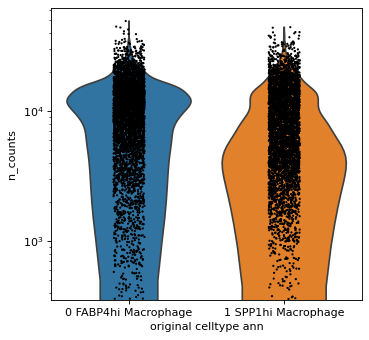

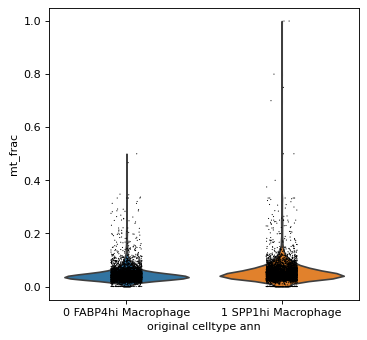

In [8]:
rcParams['figure.figsize'] = [5, 5]
rcParams['figure.dpi'] = 80

# Quality control - plot QC metrics
#Sample quality plots
t1 = sc.pl.violin(ad, 'n_counts', groupby='original_celltype_ann', size=2, log=True, cut=0)
t2 = sc.pl.violin(ad, 'mt_frac', groupby='original_celltype_ann')

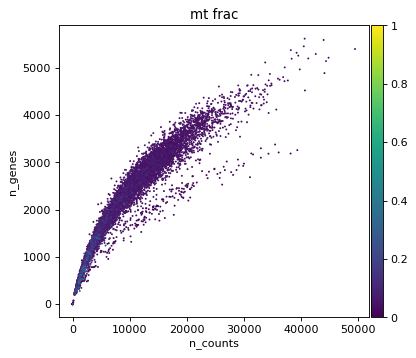

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


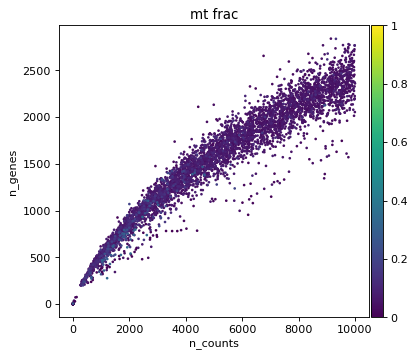

In [9]:
#Data quality summary plots
p1 = sc.pl.scatter(ad, 'n_counts', 'n_genes', color='mt_frac')
p2 = sc.pl.scatter(ad[ad.obs['n_counts'] < 10000], 'n_counts', 'n_genes', color='mt_frac')

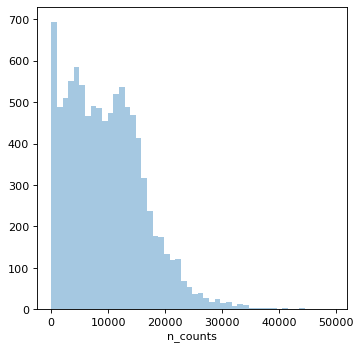

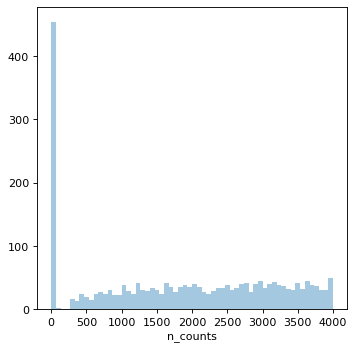

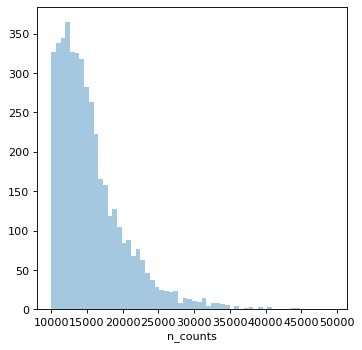

In [10]:
#Thresholding decision: counts
p3 = sns.distplot(ad.obs['n_counts'], kde=False)
plt.show()
p4 = sns.distplot(ad.obs['n_counts'][ad.obs['n_counts']<4000], kde=False, bins=60)
plt.show()
p5 = sns.distplot(ad.obs['n_counts'][ad.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

### Perform scran normalization in Morse to checkout behavior

Perform a clustering for scran normalization in clusters

### Morse counts threshold filtering

In [11]:
ad = ad[ad.X.sum(axis=1) > 1000,:]
ad = ad[ad.obs['mt_frac'] < 0.2,:]
ad = ad[ad.obs['n_genes'] > 700,:]
ad

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 8780 × 33694
    obs: 'GSM', 'sample.id', 'dataset', 'last_author/PI', 'lung_vs_nasal', 'original_celltype_ann', 'sample', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_highest_res', 'ann_new', "3' or 5'", 'BMI', 'Institute', 'Study_PI', 'age, in years', 'age, range', 'anatomical region coarse', 'anatomical region detailed', 'cause of death', 'cell ranger version', 'cell ranger version ', 'cell viability %', 'cells or nuclei', 'comments', 'condition', 'cultured', 'disease status', 'enrichment', 'enrichment ', 'ensembl release reference genome', 'ethnicity', 'fresh or frozen', 'known lung disease', 'library-construction batch', 'library_ID', 'mixed ethnicity', 'number of cells loaded', 'pre or postnatal', 'publication_ID', 'reference genome coarse', 'relative sample collection timepoint', 'repository_ID', 'sample type

In [12]:
ad = ad.copy()
sc.pp.normalize_per_cell(ad, counts_per_cell_after=1e6)
sc.pp.log1p(ad)
sc.pp.pca(ad, n_comps=15)
sc.pp.neighbors(ad)
sc.tl.louvain(ad, key_added='groups', resolution=0.5)

In [43]:
ad.write('data/morse/morse_input_scvi_scanpy_norm.h5ad', compression='lzf')

<a id="Preprocess_scran_morse"></a>

### Preprocess variables for scran normalization
- Important: **Here data_mat has to be an ndarray** otherwise an error is thrown and handling it is most likely hard/not possible (see anndata2ri docs)

In [13]:
input_groups = ad_pp.obs['groups']
data_mat = ad.X.T.toarray()
# data_mat = ad.X.toarray()

In [ ]:
%%R -i data_mat -i input_groups -o size_factors
size_factors = computeSumFactors(data_mat, min.mean=.1) # clusters=input_groups, min.mean=0.1)

In [ ]:
print('done...')

In [ ]:
print('done.2')

In [ ]:
#Delete ad_pp
del ad_pp

In [ ]:
# Visualize the estimated size factors
ad.obs['size_factors'] = size_factors
sc.pl.scatter(ad, 'size_factors', 'n_counts')
sc.pl.scatter(ad, 'size_factors', 'n_genes')
sns.distplot(size_factors, bins=50, kde=False)
plt.show()

In [ ]:
#Keep the count data in a counts layer
ad.layers["counts"] = ad.X.copy()

In [ ]:
#Normalize adata 
ad.X /= ad.obs['size_factors'].values[:,None]
sc.pp.log1p(ad)

In [ ]:
ad.X = np.array(ad.X)

In [ ]:
# Store the full data set in 'raw' as log-normalised data for statistical testing
ad.raw = ad

In [ ]:
type(ad.raw.X)

In [ ]:
ad.X = np.array(ad.X)
sc.pp.highly_variable_genes(ad, n_top_genes=4000)
# print('\n','Number of highly variable genes: {:d}'.format(np.sum(ad.var['highly_variable'])))

In [ ]:
sc.pl.highly_variable_genes(ad)

In [ ]:
# Calculate the visualizations
sc.pp.pca(ad, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(ad)

sc.tl.tsne(ad, n_jobs=12) #Note n_jobs works for MulticoreTSNE, but not regular implementation)
sc.tl.umap(ad)
sc.tl.diffmap(ad)
sc.tl.draw_graph(ad)

In [ ]:
sc.pl.pca_scatter(ad, color='n_counts')
sc.pl.tsne(ad, color='n_counts')
sc.pl.umap(ad, color='n_counts')
sc.pl.diffmap(ad, color='n_counts', components=['1,2','1,3'])
sc.pl.draw_graph(ad, color='n_counts')

In [ ]:
# Perform clustering - using highly variable genes
sc.tl.louvain(ad, key_added='louvain_r1')
sc.tl.louvain(ad, resolution=0.5, key_added='louvain_r0.5', random_state=10)

In [ ]:
condition_ad = {'SC14': 'healthy',
                   'SC45': 'healthy',
                   'SC56': 'healthy',
                   'SC59': 'healthy',
                   'SC155': 'healthy',
                   'SC156': 'healthy'}
ad.obs['condition.morse'] = ad.obs['sample'].map(condition_ad)

In [ ]:
ad.obs['louvain_r0.5'].value_counts()

In [ ]:
#Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(ad, color=['louvain_r1', 'louvain_r0.5'], palette=sc.pl.palettes.default_102)
sc.pl.umap(ad, color=['original_celltype_ann', 'n_counts', 'condition.morse'])
sc.pl.umap(ad, color=['log_counts', 'mt_frac', 'sample'])

### The following snippet of code needs to be put up otherwise this section will not run properly

In [ ]:
ad.raw.X = np.array(ad.raw.X)

In [ ]:
#Calculate marker genes
sc.tl.rank_genes_groups(ad, groupby='louvain_r0.5', key_added='rank_genes_r0.5')

In [ ]:
#Plot marker genes
sc.pl.rank_genes_groups(ad, key='rank_genes_r0.5', groups=['0', '1', '2', '3'], fontsize=12)
sc.pl.rank_genes_groups(ad, key='rank_genes_r0.5', groups=['4', '5', '6', '7'], fontsize=12)


<a id='Checking_marker_genes_saliba'></a>

### Checking marker genes proposed to be relevant

In [74]:
ad.var

,ensembl,symbol
ENSG00000243485,ENSG00000243485,RP11-34P13.3
ENSG00000237613,ENSG00000237613,FAM138A
ENSG00000186092,ENSG00000186092,OR4F5
ENSG00000238009,ENSG00000238009,RP11-34P13.7
ENSG00000239945,ENSG00000239945,RP11-34P13.8
...,...,...
ENSG00000277856,ENSG00000277856,AC233755.2
ENSG00000275063,ENSG00000275063,AC233755.1
ENSG00000271254,ENSG00000271254,AC240274.1
ENSG00000277475,ENSG00000277475,AC213203.1


In [73]:
marker_genes = {}
marker_genes['MP.markers'] = {"TREM2", "CD9", "SPP1", "GPNMB", "LGALS3", "LGALS1", "FABP4", "FABP5", "ACP5", "PSAP",
                                 "FTH1", "LIPA", "CTSD", "CTSB", "CSTB", "CTSL", "APOE", "APOC1", "CD63", "LPL"}
marker_genes['MP.others'] = {"FTL1", "CTSC", "HEXA", "HEXB", "MMP12", "MERTK", "TYROBP", "MFGE8", "DOCK1", "ADGRB1", "IL7R"}
print(marker_genes)

for k in marker_genes:
    marker_genes[k] = marker_genes[k].intersection(set(ad.var.symbol))
    print(k, len(marker_genes[k]))

{'MP.markers': {'FTH1', 'CD63', 'FABP5', 'CTSL', 'GPNMB', 'APOE', 'SPP1', 'ACP5', 'LGALS3', 'CD9', 'CSTB', 'LPL', 'TREM2', 'CTSD', 'APOC1', 'CTSB', 'LIPA', 'FABP4', 'LGALS1', 'PSAP'}, 'MP.others': {'HEXB', 'CTSC', 'HEXA', 'IL7R', 'ADGRB1', 'MERTK', 'DOCK1', 'TYROBP', 'MFGE8', 'MMP12', 'FTL1'}}


{'MP.markers': set(), 'MP.others': set()}

In [ ]:
marker_genes

In [ ]:
ad.var

In [ ]:
cell_annotation = sc.tl.marker_gene_overlap(ad, marker_genes, key='rank_genes_r0.5', top_n_markers=100)
cell_annotation

In [ ]:

cell_annotation_norm = sc.tl.marker_gene_overlap(ad, marker_genes, key='rank_genes_r0.5', normalize='reference', top_n_markers=200)
sns.heatmap(cell_annotation_norm, cbar=False, annot=True)

In [ ]:
from matplotlib import colors
#Define a nice colour map for gene expression
colors_red = plt.cm.Reds(np.linspace(0, 1, 128))
colors_blue = plt.cm.Blues(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors_red])
mymap_red = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
colorsComb = np.vstack([colors3, colors_blue])
mymap_blue = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


In [ ]:
ad.var_names_make_unique()

In [ ]:
for k in marker_genes:
    print(k)
    sc.tl.score_genes(ad, list(marker_genes[k])) #  ctrl_size=50, gene_pool=None, n_bins=25, score_name='score', random_state=0, copy=False, use_raw=None)
    ad.obs['score.' + k] = ad.obs['score']
    del ad.obs['score']

In [ ]:
sc.pl.umap(ad, color=['louvain_r0.5', 'condition.morse', 'sample'], cmap=mymap) # ['original_celltype_ann', 'n_counts', 'condition.morse']
sc.pl.umap(morse, color=['score.mac.signature', 'score.mac.others'], cmap=mymap_blue) # ['original_celltype_ann', 'n_counts', 'condition.ad']

In [ ]:
sc.pl.umap(ad, color=marker_genes['mac.signature'], cmap=mymap) # ['original_celltype_ann', 'n_counts', 'condition.morse']

In [ ]:
sc.pl.umap(ad, color=marker_genes['mac.signature'], cmap=mymap) # ['original_celltype_ann', 'n_counts', 'condition.morse']

In [61]:
ad.var.index = np.array(ad.var.symbol)
ad.var_names_make_unique()

In [62]:
ad.var.index.value_counts()

EGFL6           1
RP11-815M8.1    1
KCNC1           1
SLC17A8         1
ZNF549          1
               ..
MSANTD4         1
LINC01558       1
CTA-243E7.2     1
XXYLT1          1
GABARAP         1
Length: 33694, dtype: int64

In [63]:
for k in ['MP.markers', 'MP.others']:
    next_marker_genes = marker_genes[k]
    print(k, len(ad))
    sc.tl.score_genes(ad, next_marker_genes, use_raw=False, score_name=k + ".score")


MP.markers 8780


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


MP.others 8780


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [64]:
ad.obs

,GSM,sample.id,dataset,last_author/PI,lung_vs_nasal,original_celltype_ann,sample,total_counts,log10_total_counts,n_genes_detected,...,n_counts,log_counts,n_genes,mt_frac,size_factors,louvain_r1,louvain_r0.5,condition.morse,MP.markers.score,MP.others.score
barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGGTCATGCCG-1-SC45,GSM3660644,SC45NOR,Pittsburgh_Lafyatis_2019Morse_10Xv2,Lafyatis/Rojas,lung,1 SPP1hi Macrophage,SC45,4703.0,3.672375,1442,...,3038.0,8.018954,1206,0.052337,0.326308,0,1,healthy,1.333640,0.169076
AAACCTGGTGGTGTAG-1-SC45,GSM3660644,SC45NOR,Pittsburgh_Lafyatis_2019Morse_10Xv2,Lafyatis/Rojas,lung,1 SPP1hi Macrophage,SC45,5371.0,3.730055,1556,...,5557.0,8.622813,1574,0.045528,0.474200,0,1,healthy,2.120104,0.475861
AAACCTGGTTGTACAC-1-SC45,GSM3660644,SC45NOR,Pittsburgh_Lafyatis_2019Morse_10Xv2,Lafyatis/Rojas,lung,1 SPP1hi Macrophage,SC45,15027.0,4.176872,3025,...,4771.0,8.470311,1372,0.057850,0.374147,8,1,healthy,1.448630,0.335282
AAACCTGTCACAACGT-1-SC45,GSM3660644,SC45NOR,Pittsburgh_Lafyatis_2019Morse_10Xv2,Lafyatis/Rojas,lung,1 SPP1hi Macrophage,SC45,7806.0,3.892429,2170,...,8826.0,9.085457,2104,0.046794,0.804564,8,1,healthy,1.992919,0.797149
AAACGGGCACAGCGTC-1-SC45,GSM3660644,SC45NOR,Pittsburgh_Lafyatis_2019Morse_10Xv2,Lafyatis/Rojas,lung,0 FABP4hi Macrophage,SC45,7709.0,3.886998,2263,...,5150.0,8.546752,1523,0.054757,0.432858,8,1,healthy,1.501712,0.297146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACAGGACCCT-1-SC156,GSM3660648,SC156NORUP,Pittsburgh_Lafyatis_2019Morse_10Xv2,Lafyatis/Rojas,lung,0 FABP4hi Macrophage,SC156,14965.0,4.175076,3164,...,6496.0,8.778942,1687,0.077278,0.580740,4,0,healthy,1.926309,0.225631
TTTGTCAGTACACCGC-1-SC156,GSM3660648,SC156NORUP,Pittsburgh_Lafyatis_2019Morse_10Xv2,Lafyatis/Rojas,lung,0 FABP4hi Macrophage,SC156,17738.0,4.248905,3267,...,6591.0,8.793461,1948,0.025338,0.674075,4,0,healthy,1.484474,0.252252
TTTGTCAGTGCCTGTG-1-SC156,GSM3660648,SC156NORUP,Pittsburgh_Lafyatis_2019Morse_10Xv2,Lafyatis/Rojas,lung,1 SPP1hi Macrophage,SC156,6310.0,3.800029,1927,...,33625.0,10.423025,4490,0.038275,2.828225,5,0,healthy,1.955700,0.777485


In [291]:
ad.obs

,GSM,sample.id,n_counts,log_counts,n_genes,mt_frac,cell.type
barcode,,,,,,,
AAACCTGAGAGCTGGT-1,GSM3660651,SC87IPFLOW,18523.076172,9.826773,4109,0.005121,1-SPP1hi Macrophage
AAACCTGCATACGCCG-1,GSM3660651,SC87IPFLOW,11477.095703,9.348108,2051,0.006989,5-Fibroblast
AAACCTGGTCCGAGTC-1,GSM3660651,SC87IPFLOW,12274.981445,9.415318,2516,0.007603,9-Goblet
AAACCTGGTGTCGCTG-1,GSM3660651,SC87IPFLOW,13840.004883,9.535318,2786,0.006455,1-SPP1hi Macrophage
AAACCTGGTTCTGAAC-1,GSM3660651,SC87IPFLOW,11685.170898,9.366076,2174,0.007381,1-SPP1hi Macrophage
...,...,...,...,...,...,...,...
TTTGTCACAGAGTGTG-1,GSM3660651,SC87IPFLOW,14617.307617,9.589962,2850,0.006189,9-Goblet
TTTGTCACAGGAATGC-1,GSM3660651,SC87IPFLOW,17131.289062,9.748662,3782,0.004736,5-Fibroblast
TTTGTCACATCGGAAG-1,GSM3660651,SC87IPFLOW,8669.977539,9.067621,1472,0.009714,1-SPP1hi Macrophage


0 0 FABP4hi Macrophage


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


1 1 SPP1hi Macrophage


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


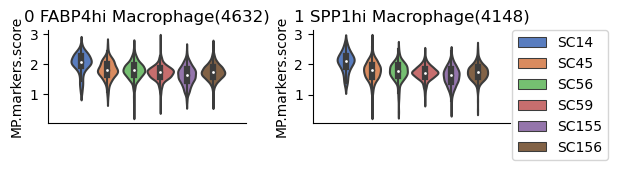

In [66]:
rcParams['figure.figsize'] = [13, 17]
rcParams['figure.dpi'] = 100
pi = 0
for ct in sorted(set(ad.obs['original_celltype_ann']), key=lambda x: ad.obs[ad.obs['original_celltype_ann'] == x].shape[0])[::-1]:
    print(pi, ct)
    
    grp = ad[ad.obs['original_celltype_ann'] == ct].obs
    
    ax = plt.subplot(10, 3, pi + 1)
    sns.violinplot(x="original_celltype_ann", y="MP.markers.score", hue='sample',
                   data=grp, palette="muted")
    plt.title(ct + '(%i)' % grp.shape[0])
    
    if pi != 1:
        ax.get_legend().set_visible(False)
    else:
        plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
    pi += 1
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    plt.xlabel('')
    plt.xticks([])

# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.subplots_adjust(right=.6, bottom=.3)

0 0 FABP4hi Macrophage


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


1 1 SPP1hi Macrophage


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


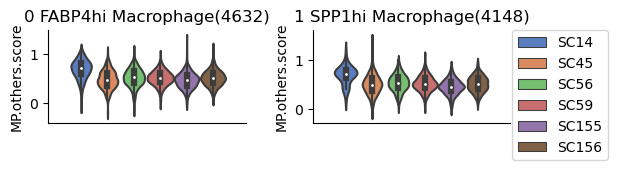